# Imports

In [2]:
import os
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import LSTM,GRU,Dense,MaxPooling1D,Dropout
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import add,Conv1D
from tensorflow.keras.layers import Input,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping




from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

# Data Preprocessing

In [5]:
root = 'C:/Users/u144572/self_development/ml_method_kaggle/own_data/'

filenames = [s.split('.')[0] for s in os.listdir(path = root) if '.wav' in s]
filenames

['10',
 '11 normalnie',
 '12 normalnie',
 '18(1)',
 '18',
 '6 glebokie',
 '6',
 '9',
 'gabi_13',
 'iza_10',
 'Janowska_6',
 'Janowska_9',
 'Jddd_7',
 'Jdd_5',
 'Jdd_6',
 'Jdd_7',
 'Jd_11',
 'Jd_5',
 'Jd_7',
 'jd_8',
 'nos_5',
 'Oddech_przez nos_11',
 'Oddech_przez usta_17',
 'ria_6',
 'spoczynek_ustami_9',
 'ustami_idąc_9']

## Read Respiratory Cycle Data

In [6]:
from tensorflow.keras.models import load_model
model = load_model('150_epochs_ilosc_cykli_bez_szumow.h5')
model.load_weights('150_epochs_ilosc_cykli_bez_szumow.weights.h5')
# loss, mae = model.evaluate(res_features, res_lables)
# print(f'Test Loss: {loss}')
# print(f'Test MAE: {mae}')

C:\Users\u144572\AppData\Roaming\Python\Python39\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 50 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [10]:
import re
import os
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import load_model

def calculated_rr_and_predicted(file_name, root):
    respiratory_cycle_number = int(re.search(r'\d+', file_name).group())
    audio_length = librosa.get_duration(filename=f'{root}{file_name}.wav')
    rr = respiratory_cycle_number / (audio_length / 60)

    # Load audio with 22050 Hz sampling rate
    # data_x, sampling_rate = librosa.load(audio_path, sr=22050)
    data_x, sampling_rate = librosa.load(f'{root}{file_name}.wav', res_type='kaiser_fast')
    
    # Extract features using MFCC (50 features)
    features = np.mean(librosa.feature.mfcc(y=data_x, sr=sampling_rate, n_mfcc=50).T, axis=0)

    # Reshape features to match the model's input shape (1, 50, 1)
    features = features.reshape(1, 50, 1)
    
    # Get the prediction
    predicted_value = model.predict(features)[0][0]

    return pd.DataFrame(data = [[file_name, rr, (predicted_value / (audio_length / 60) + 10)]], columns = ['patient_id', 'rr', "rr_predicted"])
i_list = []
for s in filenames:
    (i) = calculated_rr_and_predicted(s, root)
    i_list.append(i)
recording_info = pd.concat(i_list, axis = 0)
recording_info

C:\Users\u144572\AppData\Local\Temp\ipykernel_2144\216397016.py:12: FutureWarning: get_duration() keyword argument 'filename' has been renamed to 'path' in version 0.10.0.
	This alias will be removed in version 1.0.
  audio_length = librosa.get_duration(filename=f'{root}{file_name}.wav')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━

,patient_id,rr,rr_predicted
0,10(1),17.275799,20.371879
0,10(2),25.246858,24.791852
0,10(3),17.275799,20.371879
0,10,26.211556,25.452064
0,11 normalnie,20.988806,19.973080
0,11,29.520515,26.624526
0,12 normalnie,22.881356,20.516105
0,13,34.788297,26.920864
0,18(1),17.511242,16.122649
0,18,36.212446,22.523382


In [13]:
import os
import wave

def get_wav_length(file_path):
    """Return the length in seconds of a WAV file."""
    with wave.open(file_path, 'rb') as wav_file:
        frames = wav_file.getnframes()
        rate = wav_file.getframerate()
        duration = frames / float(rate)
        return duration

def total_wav_length(folder_path):
    """Return the total length in seconds of all WAV files in the given folder."""
    total_length = 0.0
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith('.wav'):
                file_path = os.path.join(root, file)
                total_length += get_wav_length(file_path)
    return total_length

# Specify the folder path
folder_path = r"C:\Users\u144572\self_development\ml_method_kaggle\own_data"

# Calculate the total length
total_length = total_wav_length(folder_path)
print(f"Total length of all WAV files: {total_length} seconds")


Total length of all WAV files: 767.7879141156461 seconds


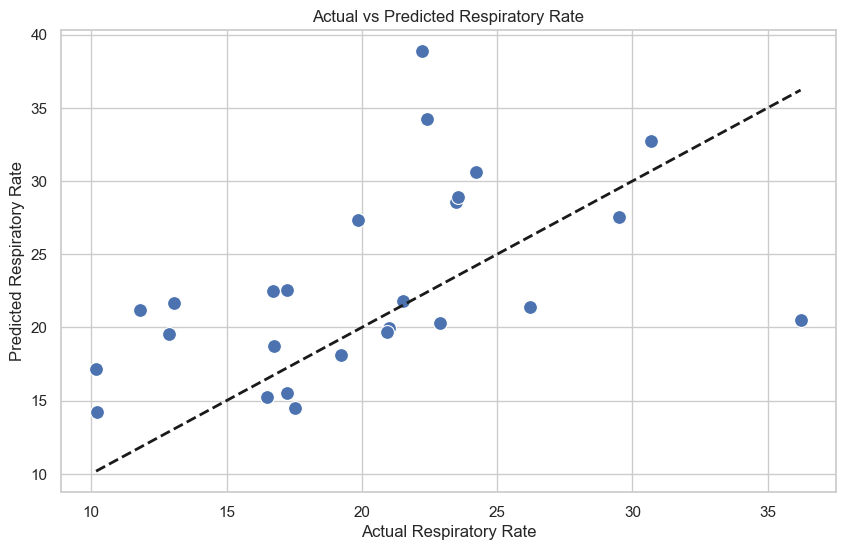

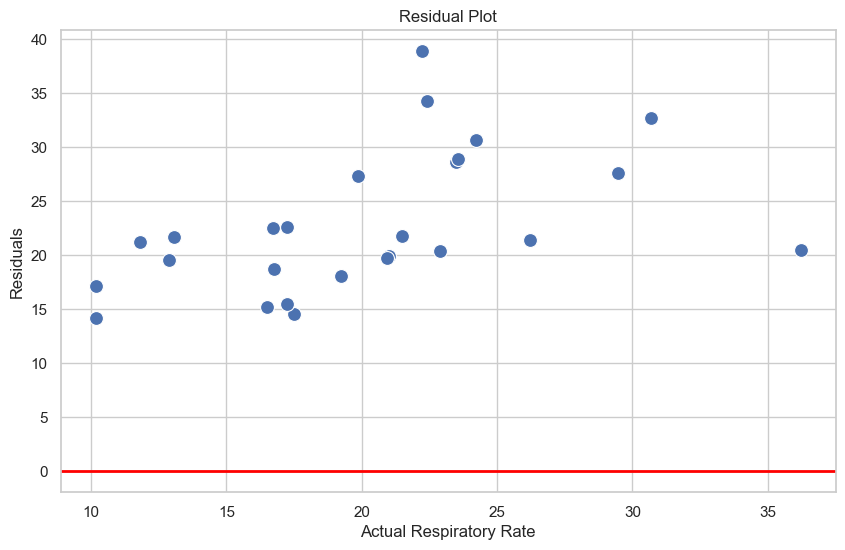

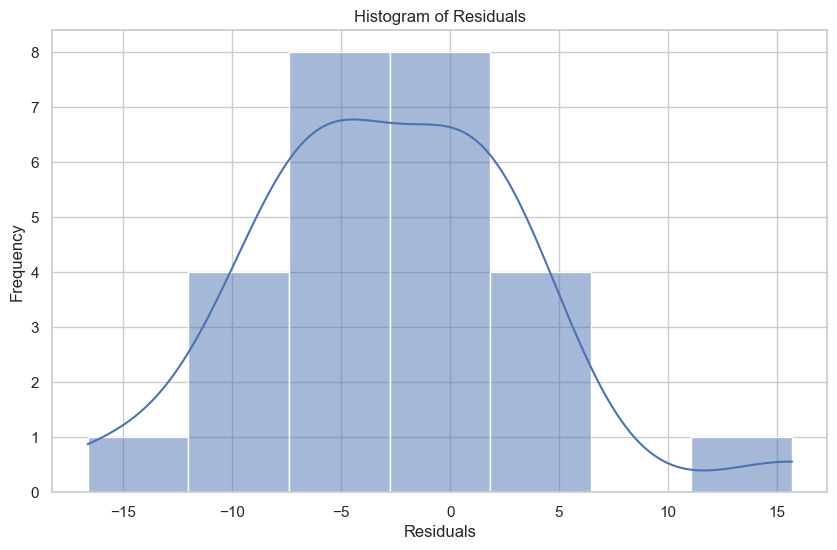

In [14]:

# Plotting
def plot_results(df):
    sns.set(style="whitegrid")
    
    # Scatter plot of actual vs predicted values
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='rr', y='rr_predicted', data=df, s=100)
    plt.plot([df['rr'].min(), df['rr'].max()], [df['rr'].min(), df['rr'].max()], 'k--', lw=2)
    plt.xlabel('Actual Respiratory Rate')
    plt.ylabel('Predicted Respiratory Rate')
    plt.title('Actual vs Predicted Respiratory Rate')
    plt.show()

    # Residual plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='rr', y='rr_predicted', data=df, s=100)
    plt.axhline(0, color='red', lw=2)
    plt.xlabel('Actual Respiratory Rate')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.show()

    # Histogram of residuals
    df['residuals'] = df['rr'] - df['rr_predicted']
    plt.figure(figsize=(10, 6))
    sns.histplot(df['residuals'], kde=True)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title('Histogram of Residuals')
    plt.show()

# Call the plotting function
plot_results(recording_info)

C:\Users\u144572\AppData\Roaming\Python\Python39\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 50 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
C:\Users\u144572\AppData\Local\Temp\ipykernel_2144\1274627362.py:16: FutureWarning: get_duration() keyword argument 'filename' has been renamed to 'path' in version 0.10.0.
	This alias will be removed in version 1.0.
  audio_length = librosa.get_duration(filename=f'{root}{file_name}.wav')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
                      Metric      Value
0  Mean Absolute Error (MAE)   3.725048
1   Mea

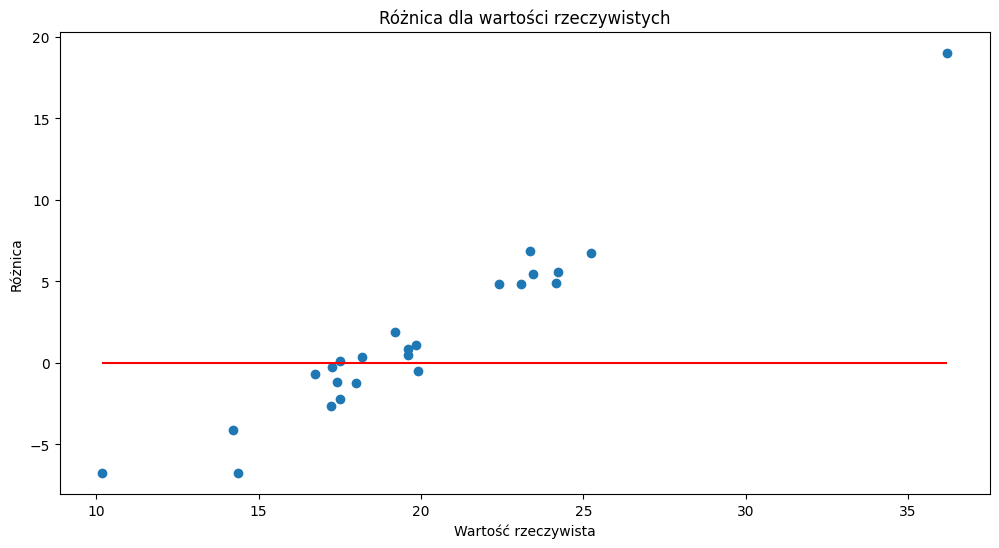

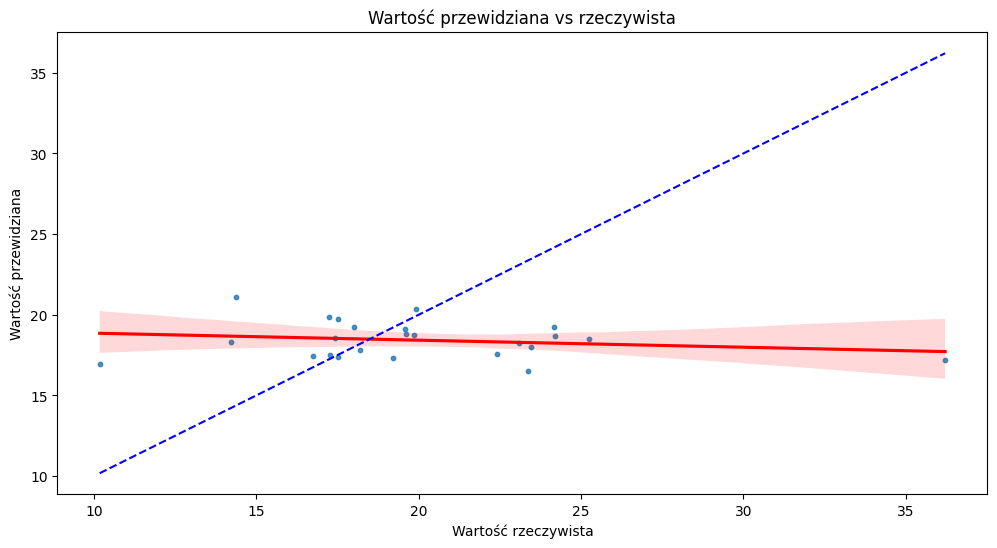

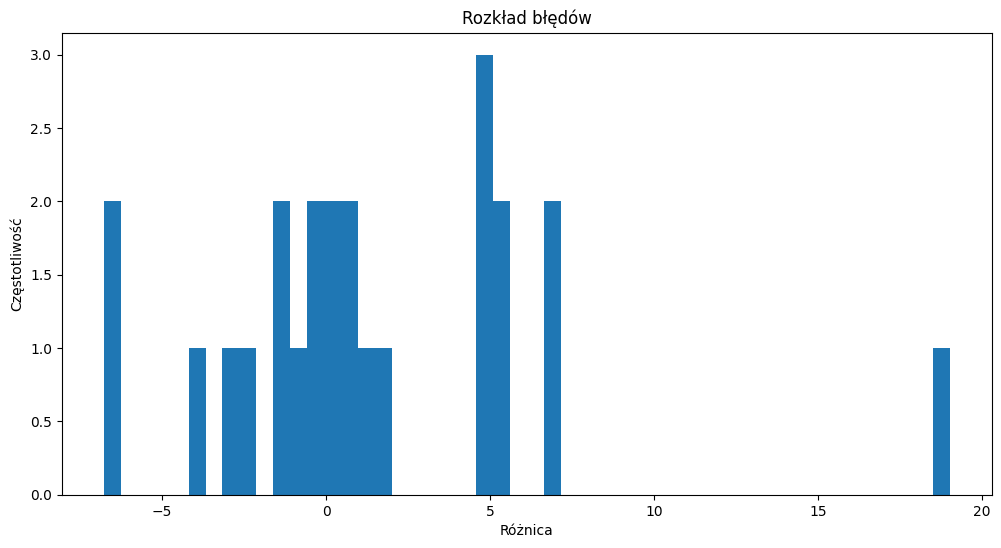

In [12]:
import re
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import load_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load your model here
model = load_model('150_epochs_model.h5')
model.load_weights('150_epochs_model.weights.h5')

def calculated_rr_and_predicted(file_name, root):
    respiratory_cycle_number = int(re.search(r'\d+', file_name).group())
    audio_length = librosa.get_duration(filename=f'{root}{file_name}.wav')
    rr = respiratory_cycle_number / (audio_length / 60)

    # Load audio with 22050 Hz sampling rate
    data_x, sampling_rate = librosa.load(f'{root}{file_name}.wav', res_type='kaiser_fast')
    
    # Extract features using MFCC (50 features)
    features = np.mean(librosa.feature.mfcc(y=data_x, sr=sampling_rate, n_mfcc=50).T, axis=0)

    # Reshape features to match the model's input shape (1, 50, 1)
    features = features.reshape(1, 50, 1)
    
    # Get the prediction
    predicted_value = model.predict(features)[0][0]

    return pd.DataFrame(data=[[file_name, rr, predicted_value]], columns=['patient_id', 'rr', "rr_predicted"])
root = 'C:/Users/u144572/self_development/ml_method_kaggle/own_data_test/'

filenames = [s.split('.')[0] for s in os.listdir(path = root) if '.wav' in s]
filenames
i_list = []
for s in filenames:
    i = calculated_rr_and_predicted(s, root)
    i_list.append(i)
recording_info = pd.concat(i_list, axis=0)

# Calculate metrics
mae = mean_absolute_error(recording_info['rr'], recording_info['rr_predicted'])
mse = mean_squared_error(recording_info['rr'], recording_info['rr_predicted'])
r2 = r2_score(recording_info['rr'], recording_info['rr_predicted'])

metrics_df = pd.DataFrame({
    'Metric': ['Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 'R² Score'],
    'Value': [mae, mse, r2]
})


# Display the metrics
print(metrics_df)

# Plotting
def plot_results(df):
    # Calculate residuals
    residuals = df['rr'] - df['rr_predicted']
    
    # Residuals Plot
    plt.figure(figsize=(12, 6))
    plt.scatter(df['rr'], residuals)
    plt.hlines(y=0, xmin=min(df['rr']), xmax=max(df['rr']), colors='r')
    plt.title('Różnica dla wartości rzeczywistych')
    plt.xlabel('Wartość rzeczywista')
    plt.ylabel('Różnica')
    plt.show()

    # Predicted vs Actual Values with Linear Regression
    plt.figure(figsize=(12, 6))
    sns.regplot(x='rr', y='rr_predicted', data=df, scatter_kws={'s':10}, line_kws={"color": "red"})
    plt.plot([min(df['rr']), max(df['rr'])], [min(df['rr']), max(df['rr'])], color='blue', linestyle='dashed')  # Line of perfect prediction
    plt.title('Wartość przewidziana vs rzeczywista')
    plt.xlabel('Wartość rzeczywista')
    plt.ylabel('Wartość przewidziana')
    plt.show()

    # Error Distribution (Histogram of residuals)
    plt.figure(figsize=(12, 6))
    plt.hist(residuals, bins=50)
    plt.title('Rozkład błędów')
    plt.xlabel('Różnica')
    plt.ylabel('Częstotliwość')
    plt.show()

# Call the plotting function
plot_results(recording_info)